In [1]:
import pandas as pd

train = pd.read_csv("data/cearmic_train.csv", index_col=["id"])
print(train.shape)
train.head()


(109, 19)


,pbratio,binder_con,defoamer,final_temp,viscosity,coating_speed,Gap,lab_temperature,lab_humidity,thickness1,thickness2,thickness3,thickness4,thickness5,average_thickness,sheet_thickness,standard_deviation,standard_deviation.1,failure
id,,,,,,,,,,,,,,,,,,,
1,0.45,24,0.97,90,1000,0.5,100,22,49,124,123,123,123,123,123.2,48.2,0.4,0.3,NaN
2,0.45,24,0.97,90,1000,0.5,300,22,49,180,182,181,180,180,180.6,105.6,0.8,0.4,NaN
3,0.45,24,0.97,90,1000,0.5,500,22,49,230,226,231,228,227,228.4,153.4,1.9,0.8,NaN
4,0.45,24,0.97,90,1000,0.5,700,22,49,260,259,256,262,254,258.2,183.2,2.9,1.1,NaN
5,0.45,24,0.97,90,1000,0.5,1000,22,49,234,243,243,238,236,238.8,163.8,3.7,1.5,번짐


In [2]:
test = pd.read_csv("data/cearmic_test.csv", index_col=["id"])
print(test.shape)
test.head()

(48, 19)


,pbratio,binder_con,defoamer,final_temp,viscosity,coating_speed,Gap,lab_temperature,lab_humidity,thickness1,thickness2,thickness3,thickness4,thickness5,average_thickness,sheet_thickness,standard_deviation,standard_deviation.1,failure
id,,,,,,,,,,,,,,,,,,,
1,0.4,30,0.5,90,3700,0.5,900,20,23,373,372,373,402,371,378.2,303.2,11.9,3.2,Pore(M)
2,0.4,30,0.5,90,3700,0.5,1000,20,23,394,398,396,431,396,403,328,14.1,3.5,Pore(M)
3,0.4,30,0.5,90,3700,0.5,1100,20,23,437,419,469,422,421,433.6,358.6,18.8,4.3,Pore(M)
4,0.4,30,0.5,90,3700,0.5,1200,20,23,460,457,452,455,456,456,381,2.6,0.6,Pore(M)
5,0.4,30,1.0,90,4400,0.5,700,20,23,331,321,320,321,315,321.6,246.6,5.2,1.6,Pore(S)


<h3>데이터 로드 끝</h3>
<h3>전처리 시작</h3>

In [28]:
#측정 불가 행은 삭제시킨다.
train = train[train.average_thickness!="측정불가"]
test = test[test.average_thickness!="측정불가"]


In [29]:
#전처리 과정 (인코딩), 0은 이상없다, 1은 이상있다.
train.loc[pd.isnull(train["failure"]), "failure"] = 0
train.loc[train["failure"]!=0,"failure"]=1

In [30]:
train

,pbratio,binder_con,defoamer,final_temp,viscosity,coating_speed,Gap,lab_temperature,lab_humidity,thickness1,thickness2,thickness3,thickness4,thickness5,average_thickness,sheet_thickness,standard_deviation,standard_deviation.1,failure
id,,,,,,,,,,,,,,,,,,,
1,0.45,24,0.97,90,1000,0.5,100,22,49,124,123,123,123,123,123.2,48.2,0.4,0.3,0
2,0.45,24,0.97,90,1000,0.5,300,22,49,180,182,181,180,180,180.6,105.6,0.8,0.4,0
3,0.45,24,0.97,90,1000,0.5,500,22,49,230,226,231,228,227,228.4,153.4,1.9,0.8,0
4,0.45,24,0.97,90,1000,0.5,700,22,49,260,259,256,262,254,258.2,183.2,2.9,1.1,0
5,0.45,24,0.97,90,1000,0.5,1000,22,49,234,243,243,238,236,238.8,163.8,3.7,1.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.40,50,0.97,90,9000,0.5,1000,23,45,421,431,435,427,440,430.8,355.8,6.5,1.5,1
106,0.40,30,0.00,90,3400,0.5,700,20,23,313,312,312,310,310,311.4,236.4,1.2,0.4,1
107,0.40,30,0.00,90,3400,0.5,900,20,23,364,365,368,389,367,370.6,295.6,9.3,2.5,1


In [31]:
test.shape

(45, 19)

In [32]:
#전처리 과정 (인코딩)
test.loc[pd.isnull(test["failure"]), "failure"] = 0
test.loc[test["failure"]!=0,"failure"]=1

<h3>전처리 끝</h3>

<h3>의사결정 트리 생성</h3>

In [74]:
#pbratio	binder_con	defoamer	final_temp	viscosity	coating_speed	Gap	lab_temperature	lab_humidity	thickness1	thickness2	thickness3	thickness4	thickness5	average_thickness	sheet_thickness	standard_deviation	standard_deviation.1 failure

feature_names = ["pbratio", "binder_con", "defoamer","final_temp", 
"viscosity","coating_speed","Gap","lab_temperature","lab_humidity"]

In [75]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(107, 9)


,pbratio,binder_con,defoamer,final_temp,viscosity,coating_speed,Gap,lab_temperature,lab_humidity
id,,,,,,,,,
1,0.45,24,0.97,90,1000,0.5,100,22,49
2,0.45,24,0.97,90,1000,0.5,300,22,49
3,0.45,24,0.97,90,1000,0.5,500,22,49
4,0.45,24,0.97,90,1000,0.5,700,22,49
5,0.45,24,0.97,90,1000,0.5,1000,22,49


In [76]:
#정답셋 준비
label_name = "failure"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(107,)


id
1    0
2    0
3    0
4    0
5    1
Name: failure, dtype: int64

In [78]:
from sklearn.tree import DecisionTreeClassifier
seed = 37
model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=37, splitter='best')

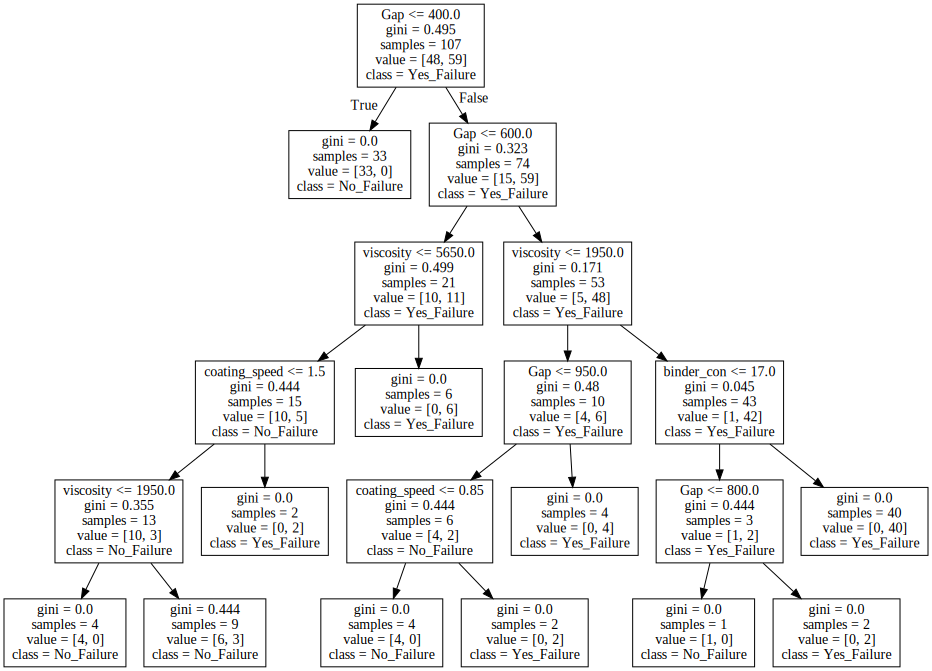

In [79]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["No_Failure", "Yes_Failure"],
                out_file="ceramic_decision-tree.dot")

with open("ceramic_decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

<h3>의사결정 트리 생성 끝</h3>

<h3>예측 시작</h3>

In [80]:
#예측
X_test = test[feature_names]
prediction = model.predict(X_test)


In [81]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1], dtype=int64)

In [82]:
real_result = test["failure"]
real_result

id
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    0
27    0
31    0
32    0
33    0
34    1
35    1
36    0
37    0
38    0
39    0
40    1
41    1
42    1
43    0
44    0
45    0
46    1
47    1
48    0
Name: failure, dtype: int64

In [83]:
def calculate_accuracy():
    amount = len(real_result)-1
    collect_cnt=0
    wrong_cnt=0
    
    for i in range (0,amount):
        if real_result.iloc[i]==prediction[i]:
            collect_cnt+=1
        else:
            wrong_cnt+=1
    
    accuracy = collect_cnt/amount *100
    
    print("테스트 개수: ",amount)
    print("맞은 개수: ",collect_cnt)
    print("틀린 개수: ",wrong_cnt)
    return accuracy

In [84]:
calculate_accuracy()

테스트 개수:  44
맞은 개수:  36
틀린 개수:  8


81.81818181818183

<h3>모델 저장</h3>

In [30]:
import pickle
from sklearn.externals import joblib

C:\Users\kyungmin\Anaconda3\envs\ceramic\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
saved_model = pickle.dumps(model)

In [32]:
# Load the pickled model
clf_from_pickle = pickle.loads(saved_model)



In [34]:
joblib.dump(model, 'decision_tree.pkl')

['decision_tree.pkl']

In [36]:
load_model = joblib.load('decision_tree.pkl')


In [37]:
prediction = load_model.predict(X_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1], dtype=int64)

<h3>정확도 측정 끝</h3>
<h3>새로운 모델 생성</h3>